In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import mean
from numpy import std
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.decomposition import PCA


The best performance from the leave-one-out cross-validation:
0.7567567567567568
The parameters for the optimal model:
{'C': 1.0, 'kernel': 'sigmoid'}
[[13  6]
 [ 3 15]]
              precision    recall  f1-score   support

         0.0       0.81      0.68      0.74        19
         1.0       0.71      0.83      0.77        18

    accuracy                           0.76        37
   macro avg       0.76      0.76      0.76        37
weighted avg       0.76      0.76      0.76        37

0.7567567567567568


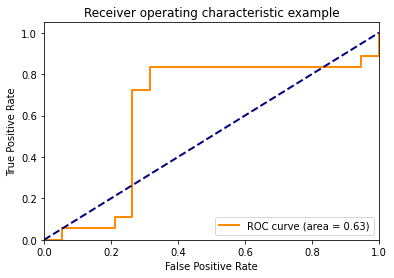

The best performance from the leave-one-out cross-validation:
0.5945945945945946
The parameters for the optimal model:
{'C': 0.1, 'kernel': 'linear'}
[[12  7]
 [ 8 10]]
              precision    recall  f1-score   support

         0.0       0.60      0.63      0.62        19
         1.0       0.59      0.56      0.57        18

    accuracy                           0.59        37
   macro avg       0.59      0.59      0.59        37
weighted avg       0.59      0.59      0.59        37

0.5945945945945946


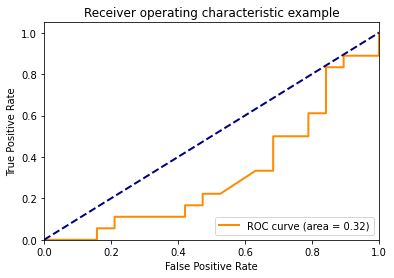

The best performance from the leave-one-out cross-validation:
0.8235294117647058
The parameters for the optimal model:
{'C': 0.5, 'kernel': 'sigmoid'}
[[14  3]
 [ 3 14]]
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        17
         1.0       0.82      0.82      0.82        17

    accuracy                           0.82        34
   macro avg       0.82      0.82      0.82        34
weighted avg       0.82      0.82      0.82        34

0.8235294117647058


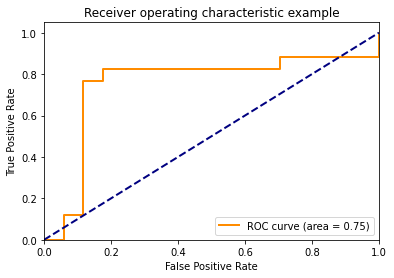

The best performance from the leave-one-out cross-validation:
0.6341463414634146
The parameters for the optimal model:
{'C': 0.1, 'kernel': 'linear'}
[[14  7]
 [ 8 12]]
              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65        21
         1.0       0.63      0.60      0.62        20

    accuracy                           0.63        41
   macro avg       0.63      0.63      0.63        41
weighted avg       0.63      0.63      0.63        41

0.6341463414634146


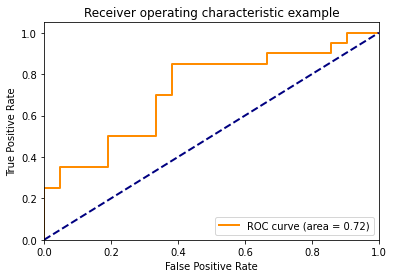

The best performance from the leave-one-out cross-validation:
0.4
The parameters for the optimal model:
{'C': 0.1, 'kernel': 'linear'}
[[ 7 11]
 [10  7]]
              precision    recall  f1-score   support

         0.0       0.41      0.39      0.40        18
         1.0       0.39      0.41      0.40        17

    accuracy                           0.40        35
   macro avg       0.40      0.40      0.40        35
weighted avg       0.40      0.40      0.40        35

0.4


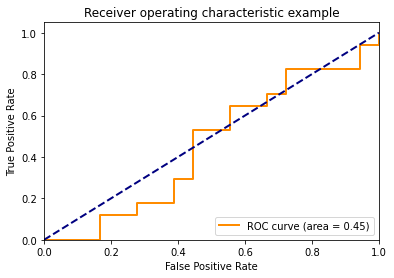

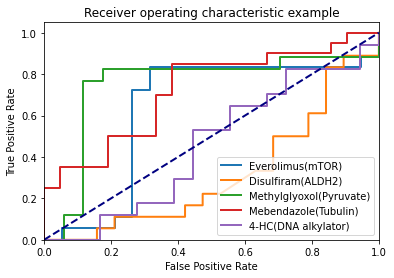

In [3]:
# SVM applied directly to the dataset

def svm_gridsearch_evaluate(X, y):
    svm = SVC(probability=True)
    # svm = SVC()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'C': [0.1, 0.5, 1.0],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
    # apply LOOCV
    cv = LeaveOneOut()
    
    # use gridsearch to test all values for n_neighbors
    svm_gscv = GridSearchCV(estimator=svm, param_grid=param_grid, cv=cv, n_jobs=-1) # Turn on cv train scores
    # fit model to data
    svm_gscv.fit(X, y)
    
    # check score for the top performing value of n_neighbors
    print("The best performance from the leave-one-out cross-validation:")
    print(svm_gscv.best_score_)
    
    # check the optimal parameters
    print("The parameters for the optimal model:")
    print(svm_gscv.best_params_)
    
    kf = KFold(n_splits=len(X))

    y_pred_list = []
    y_pred_proba_list = []
    svm_best = svm_gscv.best_estimator_
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svm_best.fit(X_train, y_train)
        y_pred = svm_best.predict(X_test)
        y_score = svm_best.predict_proba(X_test)[:,1]
        y_pred_list.append(y_pred)
        y_pred_proba_list.append(y_score)
        
    print(confusion_matrix(y, y_pred_list))
    print(classification_report(y, y_pred_list))
    print(accuracy_score(y, y_pred_list))
    
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_list, drop_intermediate=False, pos_label=1)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_pred_proba_list))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc.png') # can save to a file
    
    return fpr, tpr

if __name__ == '__main__':
    df = pd.read_csv("DREAM_data.txt", sep="\t", index_col=0)
    df_T = df.T
    df_features = df.iloc[5:].T
    
    # y1~y5, X1~X5
    df_y1 = df_T['Everolimus(mTOR)'].dropna()
    df_y2 = df_T['Disulfiram(ALDH2)'].dropna()
    df_y3 = df_T['Methylglyoxol(Pyruvate)'].dropna()
    df_y4 = df_T['Mebendazole(Tubulin)'].dropna()
    df_y5 = df_T['4-HC(DNA alkylator)'].dropna()

    df_X1 = df_features.loc[df_y1.index]
    df_X2 = df_features.loc[df_y2.index]
    df_X3 = df_features.loc[df_y3.index]
    df_X4 = df_features.loc[df_y4.index]
    df_X5 = df_features.loc[df_y5.index]

    scaler = StandardScaler()
    df_X1_zscore = scaler.fit_transform(df_X1)
    df_X2_zscore = scaler.fit_transform(df_X2)
    df_X3_zscore = scaler.fit_transform(df_X3)
    df_X4_zscore = scaler.fit_transform(df_X4)
    df_X5_zscore = scaler.fit_transform(df_X5)

    # SVM
    fpr1_z, tpr1_z = svm_gridsearch_evaluate(df_X1_zscore, df_y1.values)
    fpr2_z, tpr2_z = svm_gridsearch_evaluate(df_X2_zscore, df_y2.values)
    fpr3_z, tpr3_z = svm_gridsearch_evaluate(df_X3_zscore, df_y3.values)
    fpr4_z, tpr4_z = svm_gridsearch_evaluate(df_X4_zscore, df_y4.values)
    fpr5_z, tpr5_z = svm_gridsearch_evaluate(df_X5_zscore, df_y5.values)

    # Plot all ROC curves on one figure
    plt.figure()
    lw = 2
    plt.plot(fpr1_z, tpr1_z,
                 lw=lw, label='Everolimus(mTOR)')
    plt.plot(fpr2_z, tpr2_z,
                 lw=lw, label='Disulfiram(ALDH2)')
    plt.plot(fpr3_z, tpr3_z,
                 lw=lw, label='Methylglyoxol(Pyruvate)')
    plt.plot(fpr4_z, tpr4_z,
                 lw=lw, label='Mebendazole(Tubulin)')
    plt.plot(fpr5_z, tpr5_z,
                 lw=lw, label='4-HC(DNA alkylator)')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc_all_z.png')

We also try to apply the PCA to reduce the noise before SVM:

The best performance from the leave-one-out cross-validation:
0.5135135135135135
The parameters for the optimal model:
{'C': 0.1, 'kernel': 'poly'}
[[19  0]
 [18  0]]
              precision    recall  f1-score   support

         0.0       0.51      1.00      0.68        19
         1.0       0.00      0.00      0.00        18

    accuracy                           0.51        37
   macro avg       0.26      0.50      0.34        37
weighted avg       0.26      0.51      0.35        37

0.5135135135135135


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


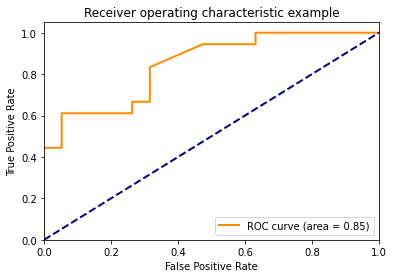

The best performance from the leave-one-out cross-validation:
0.6216216216216216
The parameters for the optimal model:
{'C': 0.1, 'kernel': 'linear'}
[[14  5]
 [ 9  9]]
              precision    recall  f1-score   support

         0.0       0.61      0.74      0.67        19
         1.0       0.64      0.50      0.56        18

    accuracy                           0.62        37
   macro avg       0.63      0.62      0.61        37
weighted avg       0.63      0.62      0.62        37

0.6216216216216216


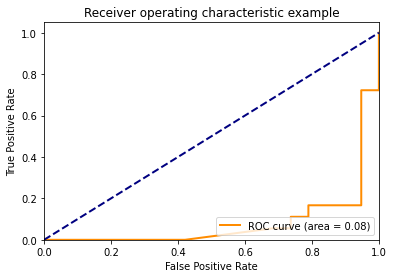

The best performance from the leave-one-out cross-validation:
0.0
The parameters for the optimal model:
{'C': 0.1, 'kernel': 'linear'}
[[ 0 17]
 [17  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      17.0
         1.0       0.00      0.00      0.00      17.0

    accuracy                           0.00      34.0
   macro avg       0.00      0.00      0.00      34.0
weighted avg       0.00      0.00      0.00      34.0

0.0


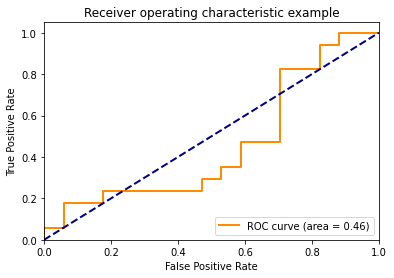

The best performance from the leave-one-out cross-validation:
0.5121951219512195
The parameters for the optimal model:
{'C': 0.1, 'kernel': 'poly'}
[[21  0]
 [20  0]]
              precision    recall  f1-score   support

         0.0       0.51      1.00      0.68        21
         1.0       0.00      0.00      0.00        20

    accuracy                           0.51        41
   macro avg       0.26      0.50      0.34        41
weighted avg       0.26      0.51      0.35        41

0.5121951219512195


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


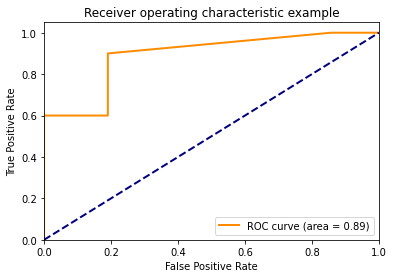

The best performance from the leave-one-out cross-validation:
0.2571428571428571
The parameters for the optimal model:
{'C': 0.1, 'kernel': 'linear'}
[[ 9  9]
 [17  0]]
              precision    recall  f1-score   support

         0.0       0.35      0.50      0.41        18
         1.0       0.00      0.00      0.00        17

    accuracy                           0.26        35
   macro avg       0.17      0.25      0.20        35
weighted avg       0.18      0.26      0.21        35

0.2571428571428571


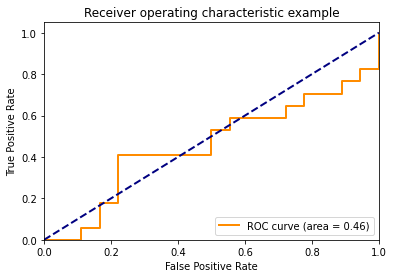

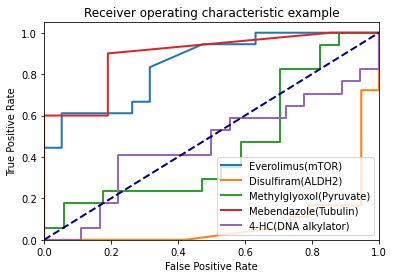

In [6]:
# SVM with PCA

def svm_gridsearch_evaluate(X, y):
    svm = SVC(probability=True)
    # svm = SVC()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'C': [0.1, 0.5, 1.0],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
    # apply LOOCV
    cv = LeaveOneOut()
    
    # use gridsearch to test all values for n_neighbors
    svm_gscv = GridSearchCV(estimator=svm, param_grid=param_grid, cv=cv, n_jobs=-1) # Turn on cv train scores
    # fit model to data
    svm_gscv.fit(X, y)
    
    # check score for the top performing value of n_neighbors
    print("The best performance from the leave-one-out cross-validation:")
    print(svm_gscv.best_score_)
    
    # check the optimal parameters
    print("The parameters for the optimal model:")
    print(svm_gscv.best_params_)
    
    kf = KFold(n_splits=len(X))

    y_pred_list = []
    y_pred_proba_list = []
    svm_best = svm_gscv.best_estimator_
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svm_best.fit(X_train, y_train)
        y_pred = svm_best.predict(X_test)
        y_score = svm_best.predict_proba(X_test)[:,1]
        y_pred_list.append(y_pred)
        y_pred_proba_list.append(y_score)
        
    print(confusion_matrix(y, y_pred_list))
    print(classification_report(y, y_pred_list))
    print(accuracy_score(y, y_pred_list))
    
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_list, drop_intermediate=False, pos_label=1)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_pred_proba_list))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc.png') # can save to a file
    
    return fpr, tpr

if __name__ == '__main__':
    df = pd.read_csv("DREAM_data.txt", sep="\t", index_col=0)
    df_T = df.T
    df_features = df.iloc[5:].T
    
    # y1~y5, X1~X5
    df_y1 = df_T['Everolimus(mTOR)'].dropna()
    df_y2 = df_T['Disulfiram(ALDH2)'].dropna()
    df_y3 = df_T['Methylglyoxol(Pyruvate)'].dropna()
    df_y4 = df_T['Mebendazole(Tubulin)'].dropna()
    df_y5 = df_T['4-HC(DNA alkylator)'].dropna()

    df_X1 = df_features.loc[df_y1.index]
    df_X2 = df_features.loc[df_y2.index]
    df_X3 = df_features.loc[df_y3.index]
    df_X4 = df_features.loc[df_y4.index]
    df_X5 = df_features.loc[df_y5.index]

    # PCA
    pca = PCA()

    pca.fit(df_X1)
    df_X1_1 = pca.transform(df_X1)
    pca.fit(df_X2)
    df_X2_1 = pca.transform(df_X2)
    pca.fit(df_X3)
    df_X3_1 = pca.transform(df_X3)
    pca.fit(df_X4)
    df_X4_1 = pca.transform(df_X4)
    pca.fit(df_X5)
    df_X5_1 = pca.transform(df_X5)

    # standarlization
    scaler = StandardScaler()
    df_X1_zscore = scaler.fit_transform(df_X1_1)
    df_X2_zscore = scaler.fit_transform(df_X2_1)
    df_X3_zscore = scaler.fit_transform(df_X3_1)
    df_X4_zscore = scaler.fit_transform(df_X4_1)
    df_X5_zscore = scaler.fit_transform(df_X5_1)

    # SVM
    fpr1_z, tpr1_z = svm_gridsearch_evaluate(df_X1_zscore, df_y1.values)
    fpr2_z, tpr2_z = svm_gridsearch_evaluate(df_X2_zscore, df_y2.values)
    fpr3_z, tpr3_z = svm_gridsearch_evaluate(df_X3_zscore, df_y3.values)
    fpr4_z, tpr4_z = svm_gridsearch_evaluate(df_X4_zscore, df_y4.values)
    fpr5_z, tpr5_z = svm_gridsearch_evaluate(df_X5_zscore, df_y5.values)

    # Plot all ROC curves on one figure
    plt.figure()
    lw = 2
    plt.plot(fpr1_z, tpr1_z,
                 lw=lw, label='Everolimus(mTOR)')
    plt.plot(fpr2_z, tpr2_z,
                 lw=lw, label='Disulfiram(ALDH2)')
    plt.plot(fpr3_z, tpr3_z,
                 lw=lw, label='Methylglyoxol(Pyruvate)')
    plt.plot(fpr4_z, tpr4_z,
                 lw=lw, label='Mebendazole(Tubulin)')
    plt.plot(fpr5_z, tpr5_z,
                 lw=lw, label='4-HC(DNA alkylator)')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc_all_z.png')